In [5]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
#from pixell import reproject
#from classy import Class
import s1 

In [6]:
map_dust_0256 = hp.read_map ("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_dust-commander_0256_R2.00.fits")

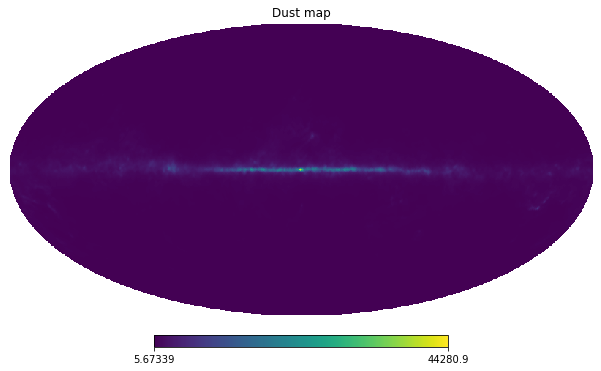

In [7]:

hp.mollview(map_dust_0256  ,title="Dust map")


In [8]:
nside = hp.pixelfunc.get_nside(map_dust_0256)
print (nside)

256


In [9]:
res_dust = hp.nside2resol (nside, arcmin= False )
res_dust_arcmin = hp.nside2resol(nside , arcmin= True)

In [10]:
cl_dust_0256 = hp.anafast(map_dust_0256)

In [11]:
lmax=np.shape(cl_dust_0256)[0]
print (lmax)
ell=np.arange(0,lmax)
norm = ell * (ell+1) / (2*np.pi)
dl_dust_0256 = cl_dust_0256 * norm

768


<ipython-input-12-6add8c9e4d7b>:1: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 360*60/ell
<ipython-input-12-6add8c9e4d7b>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(ellsc,np.log(dl_dust_0256))


Text(0, 0.5, '$log(D_l)$')

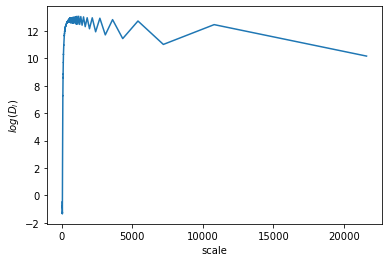

In [12]:
ellsc = 360*60/ell
plt.plot(ellsc,np.log(dl_dust_0256))
plt.xlabel("scale")
plt.ylabel("$log(D_l)$")

In [13]:
resol = hp.nside2resol(nside, arcmin=False )
resol_arcmin = hp.nside2resol(nside, arcmin=True )
print (resol)

0.003997369952915971


In [16]:
jmax = 8
theta_bin = 10000

In [17]:
mor_l = s1.morlet_arr (resol, jmax , lmax, theta_bin)
gaus_l = s1.gaus_arr (resol, jmax, lmax, theta_bin)

In [18]:
s1_dust_0256 , i1_dust_0256 = s1.compS1 (map_dust_0256 , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


In [19]:
Jf=np.arange(jmax)
scale=2**Jf*((2*resol_arcmin)/0.75)

In [20]:
s2_dust_0256  = s1.compS2 (map_dust_0256 , i1_dust_0256, mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


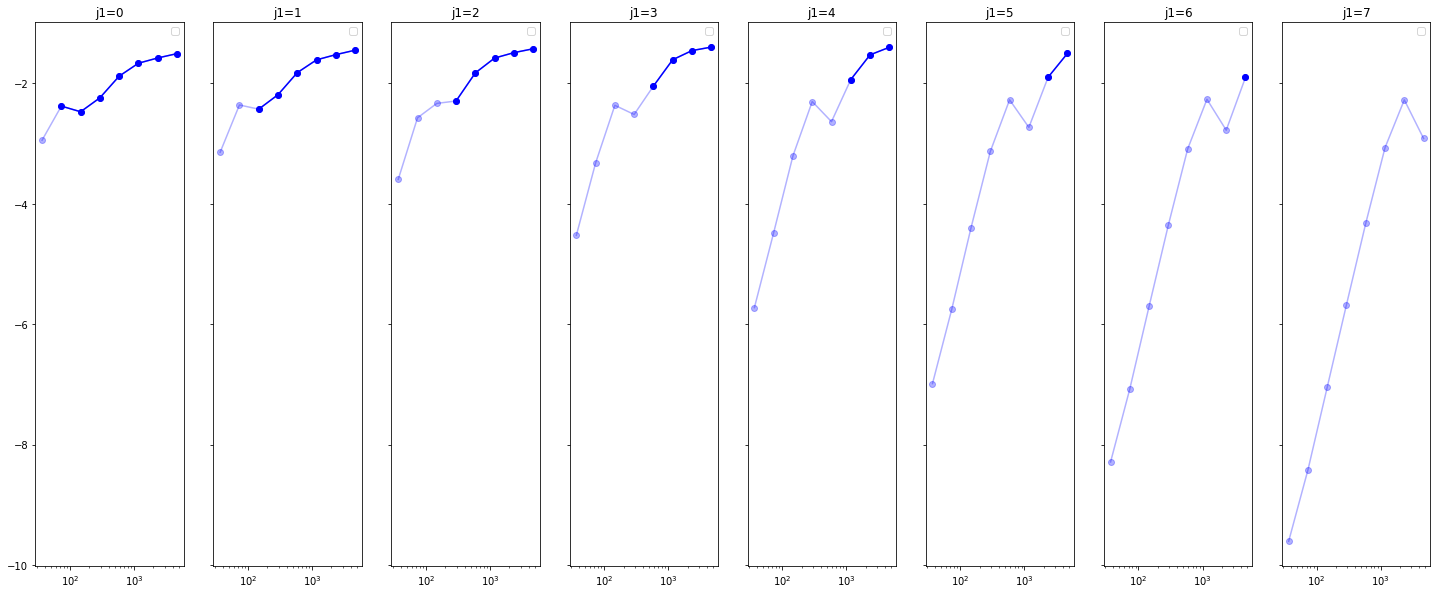

In [21]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale,np.log(s2_dust_0256[j,:]/s1_dust_0256[j]),'o-' ,alpha = 0.3 ,color = "blue")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256[j,j+1:]/s1_dust_0256[j]),'o-' , alpha =1 , color = "blue")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()

In [22]:
map_dust_0256_out = hp.synfast(cl_dust_0256,nside)

In [23]:
s1_dust_0256_out , i1_dust_0256_out = s1.compS1 (map_dust_0256_out, mor_l, gaus_l, resol, jmax, lmax , nside )

0
1
2
3
4
5
6
7


In [27]:
s2_dust_0256_out  = s1.compS2 (map_dust_0256_out , i1_dust_0256_out, mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


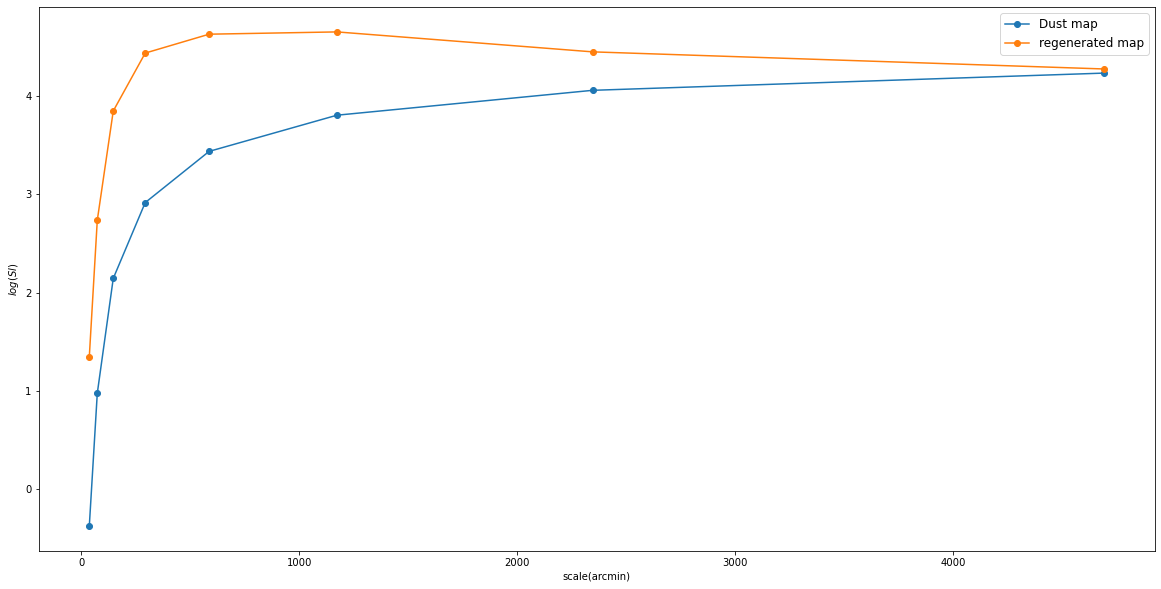

In [72]:


plt.figure(figsize=(20,10))
plt.plot (scale,np.log(s1_dust_0256),'o-')
plt.plot (scale,np.log(s1_dust_0256_out),'o-')
#plt.plot(ellsc,np.log(dl_sz))
plt.legend(["Dust map", "regenerated map"], prop={'size': 12},loc=1)
plt.xlabel("scale(arcmin)")
plt.ylabel("$log(Sl)$")

plt.savefig("dust_S1_reg.pdf")



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


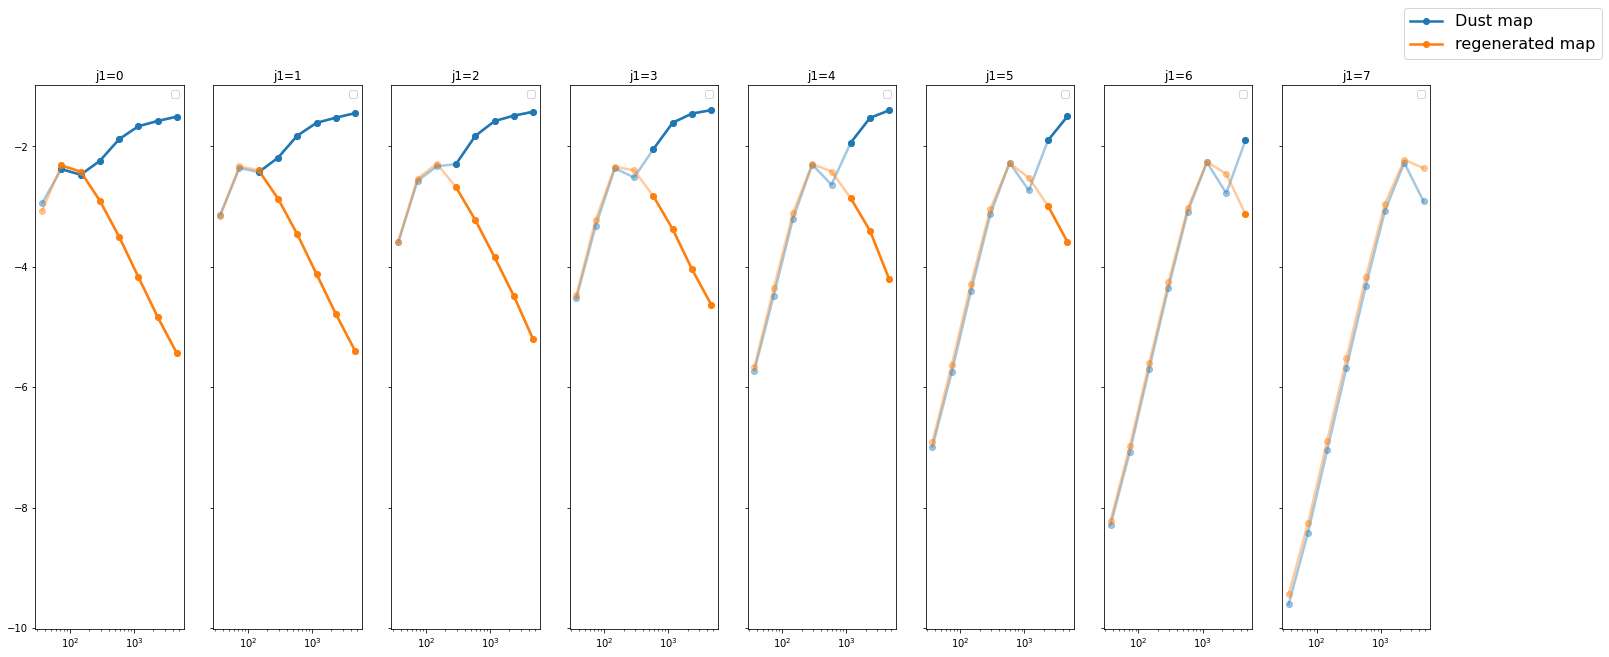

In [68]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256[j,j+1:]/s1_dust_0256[j]),'o-' , alpha =1 , color = "C0", lw=2.5)
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_out[j,j+1:]/s1_dust_0256_out[j]),'o-' , alpha =1 , color = "C1" , lw=2.5)
    ax[j].plot (scale,np.log(s2_dust_0256[j,:]/s1_dust_0256[j]),'o-' ,alpha = 0.4 ,color = "C0", lw=2.5)
    ax[j].plot (scale,np.log(s2_dust_0256_out[j,:]/s1_dust_0256_out[j]),'o-' ,alpha = 0.4 ,color = "C1", lw=2.5)
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend (["Dust map" ,"regenerated map"],prop={'size': 16},loc=1)
plt.savefig("dust_S2_reg.pdf")

In [25]:
Jf=np.arange(jmax)
scale=2**Jf*((2*res_dust_arcmin)/0.75)

plt.figure(figsize=(20,10))
plt.plot (scale,np.log(s1_dust),'o-')
plt.plot (scale,np.log(s1_dust_out),'o-')
plt.plot (scale,np.log(s1_dust_out_alm),'o-')
#plt.plot(ellsc,np.log(dl_sz))
plt.legend(["SZ map", "regenerated SZ map" , "regenerated from alm"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$log(Sl)$")


NameError: name 's1_dust' is not defined

<Figure size 1440x720 with 0 Axes>

In [35]:
mask090 = hp.read_map("/Users/arefe/Projects/ScatteringTransform/maps/HFI_Mask_GalPlane-apo0_2048_R2.00.fits" , field=5  )

In [36]:
mask097 = hp.read_map("/Users/arefe/Projects/ScatteringTransform/maps/HFI_Mask_GalPlane-apo0_2048_R2.00.fits" , field=6 )

In [37]:
mask090_0256 = hp.ud_grade(mask090 , nside_out=nside)

In [38]:
mask097_0256 = hp.ud_grade(mask097 , nside_out=nside)

In [39]:
map_dust_0256_masked_097 = hp.ma(map_dust_0256)
map_dust_0256_masked_097.mask = mask097_0256

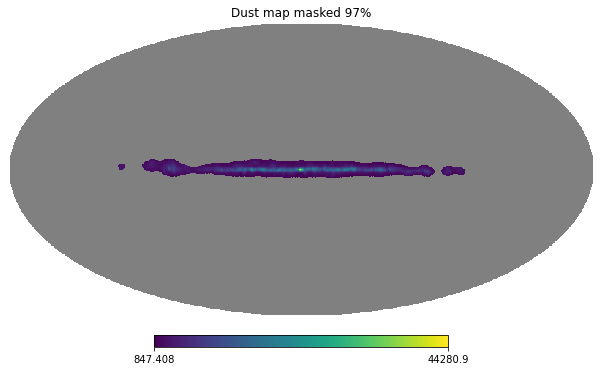

In [40]:
hp.mollview(map_dust_0256_masked_097  ,title="Dust map masked 97%")

In [44]:
map_dust_0256_masked_090 = hp.ma(map_dust_0256)
map_dust_0256_masked_090.mask = mask090_0256

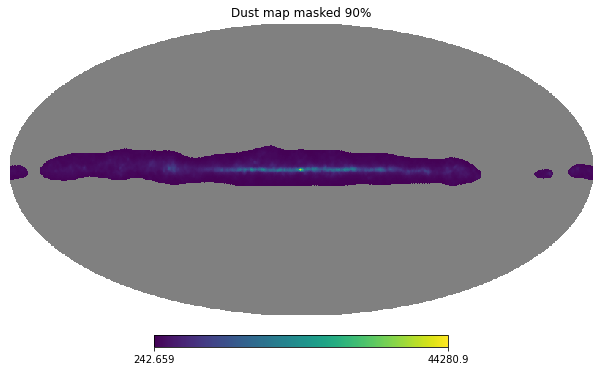

In [45]:
hp.mollview(map_dust_0256_masked_090  ,title="Dust map masked 90%")

In [47]:
s1_dust_0256_masked_090 , i1_dust_0256_masked_090 = s1.compS1 (map_dust_0256_masked_090 , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


In [48]:
s1_dust_0256_masked_097 , i1_dust_0256_masked_097 = s1.compS1 (map_dust_0256_masked_097 , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


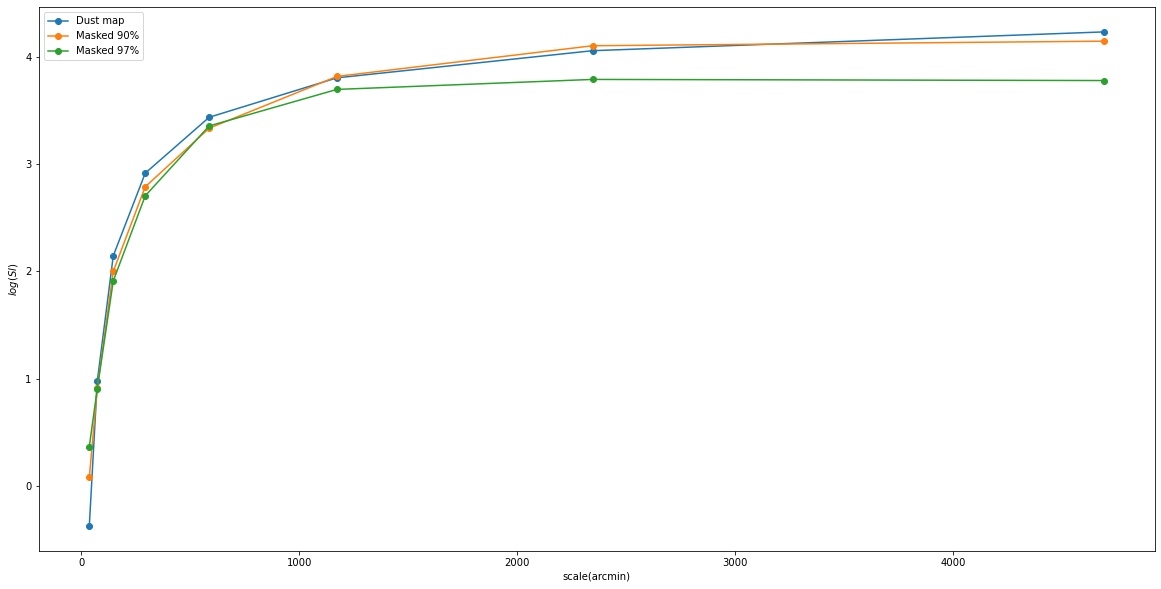

In [55]:
Jf=np.arange(jmax)
scale=2**Jf*((2*res_dust_arcmin)/0.75)

plt.figure(figsize=(20,10))
plt.plot (scale,np.log(s1_dust_0256),'o-')
plt.plot (scale,np.log(s1_dust_0256_masked_090),'o-')
plt.plot (scale,np.log(s1_dust_0256_masked_097),'o-')
#plt.plot(ellsc,np.log(dl_sz))
plt.legend(["Dust map",  "Masked 90%" , "Masked 97%"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$log(Sl)$")

plt.savefig("dust_S1_mask.pdf")

In [50]:
s2_dust_0256_masked_090  = s1.compS2 (map_dust_0256_masked_090 , i1_dust_0256_masked_090, mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


In [51]:
s2_dust_0256_masked_097  = s1.compS2 (map_dust_0256_masked_097 , i1_dust_0256_masked_097, mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


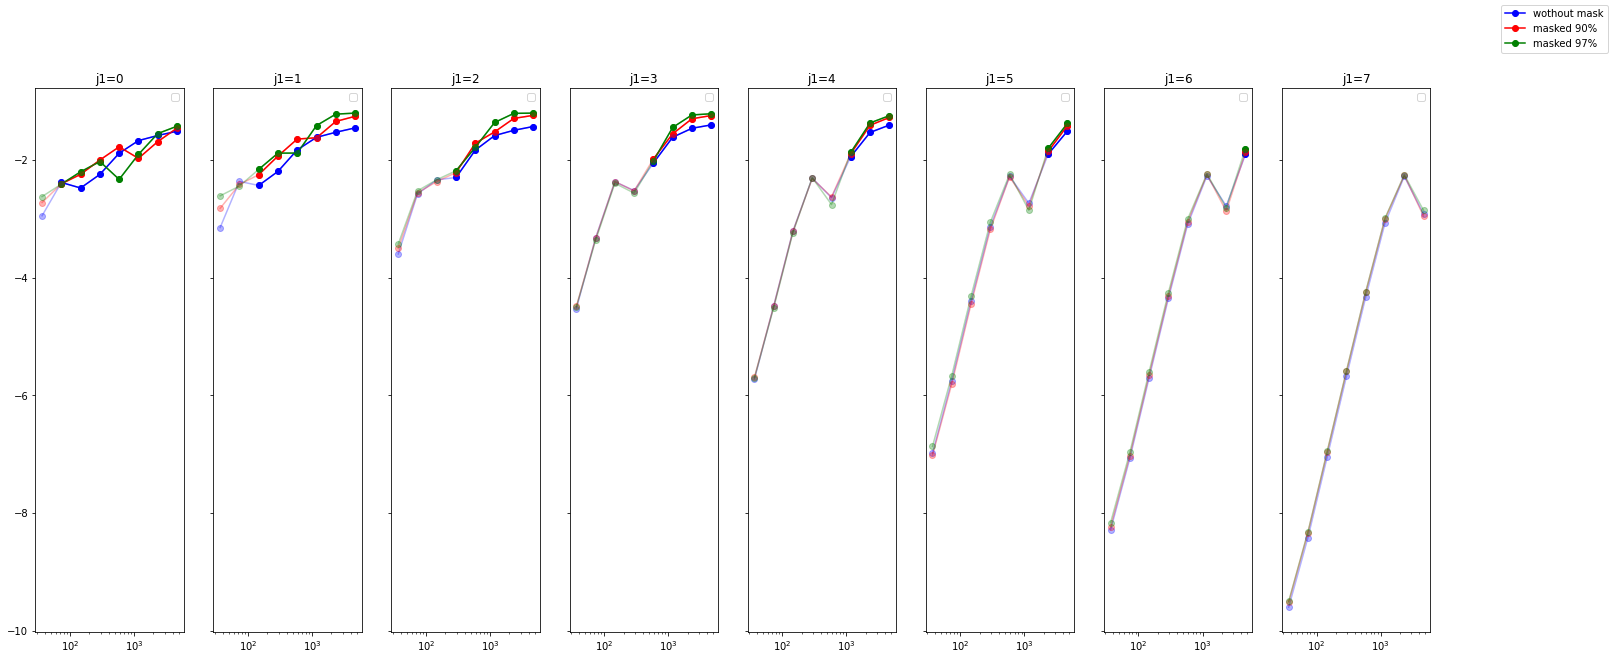

In [56]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256[j,j+1:]/s1_dust_0256[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_masked_090[j,j+1:]/s1_dust_0256_masked_090[j]),'o-' , alpha =1 , color = "red")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_masked_097[j,j+1:]/s1_dust_0256_masked_097[j]),'o-' , alpha =1 , color = "green")
    ax[j].plot (scale,np.log(s2_dust_0256[j,:]/s1_dust_0256[j]),'o-' ,alpha = 0.3 ,color = "blue")
    ax[j].plot (scale,np.log(s2_dust_0256_masked_090[j,:]/s1_dust_0256_masked_090[j]),'o-' ,alpha = 0.3 ,color = "red")
    ax[j].plot (scale,np.log(s2_dust_0256_masked_097[j,:]/s1_dust_0256_masked_097[j]),'o-' ,alpha = 0.3 ,color = "green")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend(["wothout mask",  "masked 90%" , "masked 97%"])


plt.savefig("dust_S2_mask.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


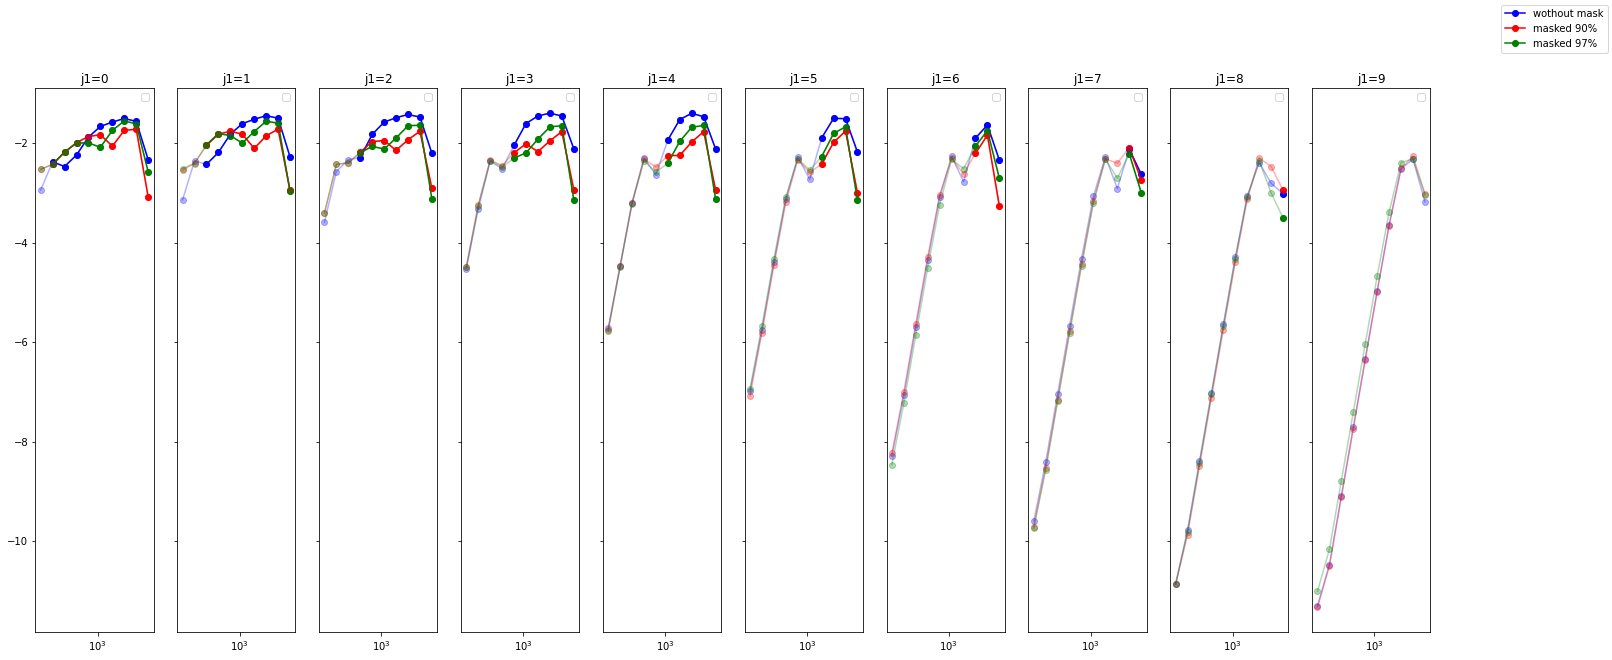

In [103]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256[j,j+1:]/s1_dust_0256[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_antimasked_090[j,j+1:]/s1_dust_0256_antimasked_090[j]),'o-' , alpha =1 , color = "red")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_antimasked_097[j,j+1:]/s1_dust_0256_antimasked_097[j]),'o-' , alpha =1 , color = "green")
    ax[j].plot (scale,np.log(s2_dust_0256[j,:]/s1_dust_0256[j]),'o-' ,alpha = 0.3 ,color = "blue")
    ax[j].plot (scale,np.log(s2_dust_0256_antimasked_090[j,:]/s1_dust_0256_antimasked_090[j]),'o-' ,alpha = 0.3 ,color = "red")
    ax[j].plot (scale,np.log(s2_dust_0256_antimasked_097[j,:]/s1_dust_0256_antimasked_097[j]),'o-' ,alpha = 0.3 ,color = "green")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend(["wothout mask",  "masked 90%" , "masked 97%"])

In [53]:
map_dust_0256_antimasked_090 = hp.ma(map_dust_0256)
map_dust_0256_antimasked_090.mask = np.logical_not(mask090_0256)

In [54]:
map_dust_0256_antimasked_097 = hp.ma(map_dust_0256)
map_dust_0256_antimasked_097.mask = np.logical_not(mask097_0256)

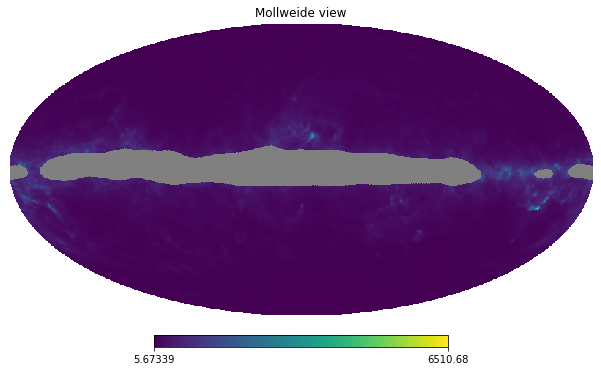

In [99]:
hp.mollview(map_dust_0256_antimasked_090)

In [55]:
s1_dust_0256_antimasked_090 , i1_dust_0256_antimasked_090 = s1.compS1 (map_dust_0256_antimasked_090 , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


In [56]:
s1_dust_0256_antimasked_097 , i1_dust_0256_antimasked_097 = s1.compS1 (map_dust_0256_antimasked_097 , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


In [57]:
s2_dust_0256_antimasked_090  = s1.compS2 (map_dust_0256_antimasked_090 , i1_dust_0256_antimasked_090, mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


In [58]:
s2_dust_0256_antimasked_097  = s1.compS2 (map_dust_0256_antimasked_097 , i1_dust_0256_antimasked_097, mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


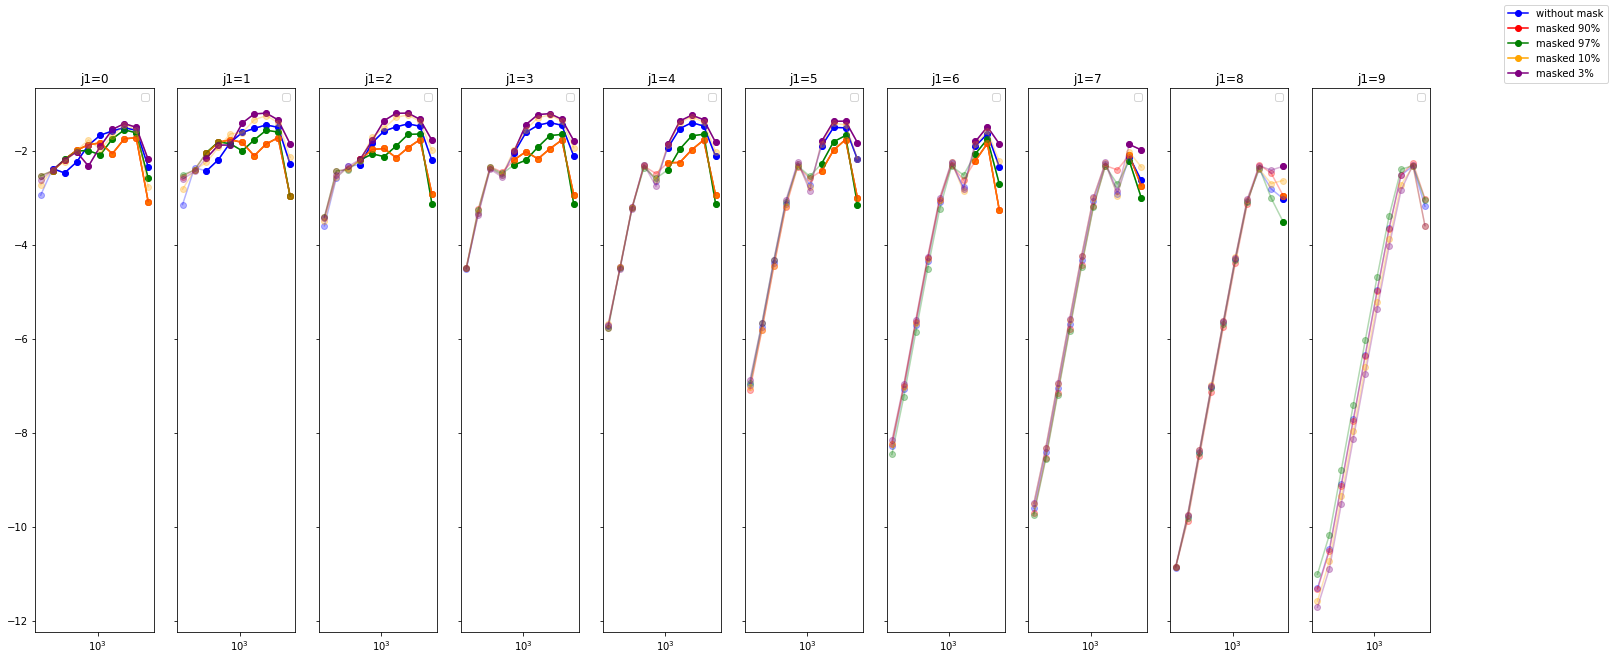

In [98]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256[j,j+1:]/s1_dust_0256[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_antimasked_090[j,j+1:]/s1_dust_0256_antimasked_090[j]),'o-' , alpha =1 , color = "red")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_antimasked_097[j,j+1:]/s1_dust_0256_antimasked_097[j]),'o-' , alpha =1 , color = "green")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_antimasked_090[j,j+1:]/s1_dust_0256_antimasked_090[j]),'o-' , alpha =1 , color = "orange")
    ax[j].plot (scale[j+1:],np.log(s2_dust_0256_masked_097[j,j+1:]/s1_dust_0256_masked_097[j]),'o-' , alpha =1 , color = "purple")
    ax[j].plot (scale,np.log(s2_dust_0256[j,:]/s1_dust_0256[j]),'o-' ,alpha = 0.3 ,color = "blue")
    ax[j].plot (scale,np.log(s2_dust_0256_antimasked_090[j,:]/s1_dust_0256_antimasked_090[j]),'o-' ,alpha = 0.3 ,color = "red")
    ax[j].plot (scale,np.log(s2_dust_0256_antimasked_097[j,:]/s1_dust_0256_antimasked_097[j]),'o-' ,alpha = 0.3 ,color = "green")
    ax[j].plot (scale,np.log(s2_dust_0256_masked_090[j,:]/s1_dust_0256_masked_090[j]),'o-' ,alpha = 0.3 ,color = "orange")
    ax[j].plot (scale,np.log(s2_dust_0256_masked_097[j,:]/s1_dust_0256_masked_097[j]),'o-' ,alpha = 0.3 ,color = "purple")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend(["without mask" , "masked 90%" , "masked 97%" , "masked 10%"  , "masked 3%"])

In [77]:
s1_dust_masked_097 , i1_dust_masked_097 = s1.compS1 (map_dust_masked_097 , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


Text(0, 0.5, '$log(Sl)$')

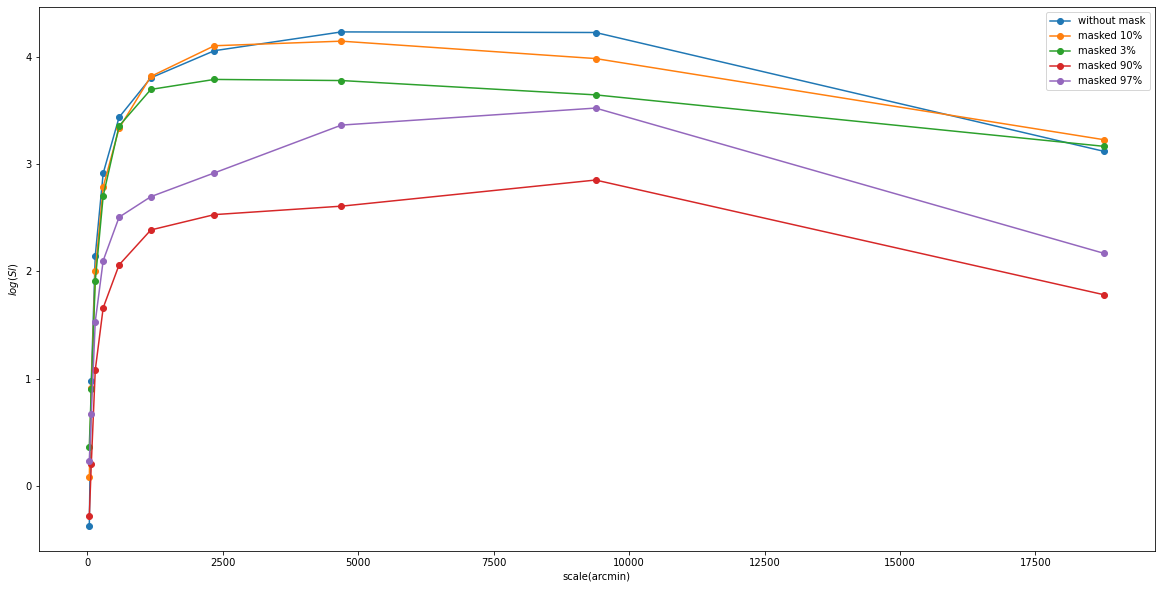

In [90]:
Jf=np.arange(jmax)
scale=2**Jf*((2*res_dust_arcmin)/0.75)

plt.figure(figsize=(20,10))
plt.plot (scale,np.log(s1_dust_0256),'o-')
#plt.plot (scale,np.log(s1_dust_out),'o-')
plt.plot (scale,np.log(s1_dust_0256_masked_090),'o-')
plt.plot (scale,np.log(s1_dust_0256_masked_097),'o-')
plt.plot (scale,np.log(s1_dust_0256_antimasked_090),'o-')
plt.plot (scale,np.log(s1_dust_0256_antimasked_097),'o-')
#plt.plot(ellsc,np.log(dl_sz))
plt.legend(["without mask",  "masked 10%", "masked 3%", "masked 90%" , "masked 97%"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$log(Sl)$")

Text(0, 0.5, '$S1$')

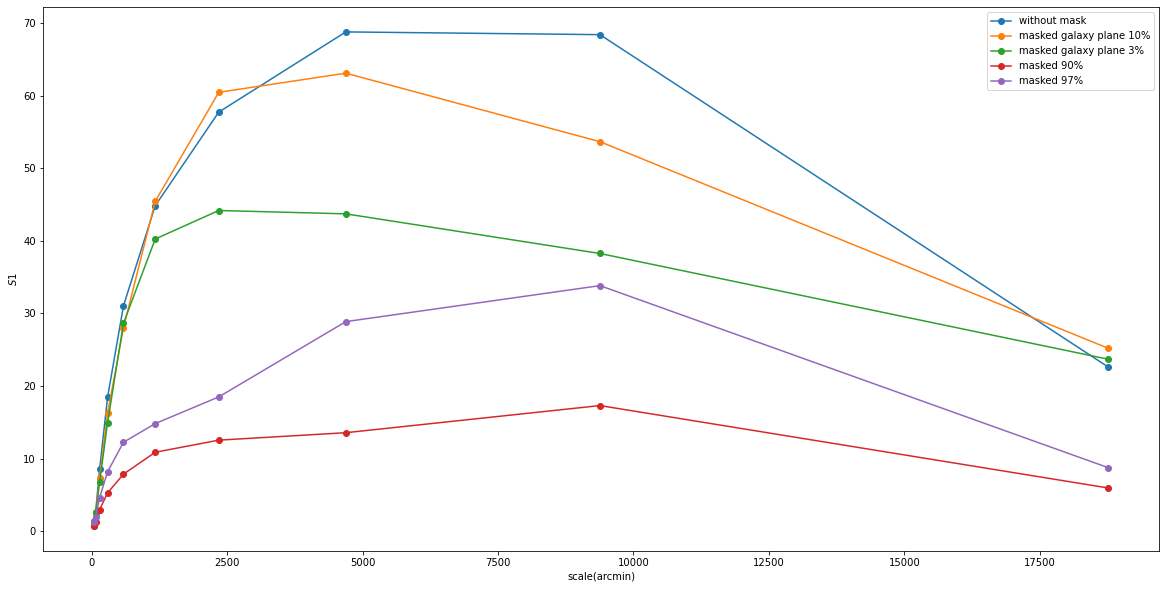

In [95]:
plt.figure(figsize=(20,10))
plt.plot (scale,s1_dust_0256,'o-')
#plt.plot (scale,np.log(s1_dust_out),'o-')
plt.plot (scale,s1_dust_0256_masked_090,'o-')
plt.plot (scale,s1_dust_0256_masked_097,'o-')
plt.plot (scale,s1_dust_0256_antimasked_090,'o-')
plt.plot (scale,s1_dust_0256_antimasked_097,'o-')
#plt.plot(ellsc,np.log(dl_sz))
plt.legend(["without mask",  "masked galaxy plane 10%", "masked galaxy plane 3%", "masked 90%" , "masked 97%"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$S1$")

In [53]:
s2_dust_masked_097  = s1.compS2 (map_dust_masked_097 , i1_dust_masked_097, mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


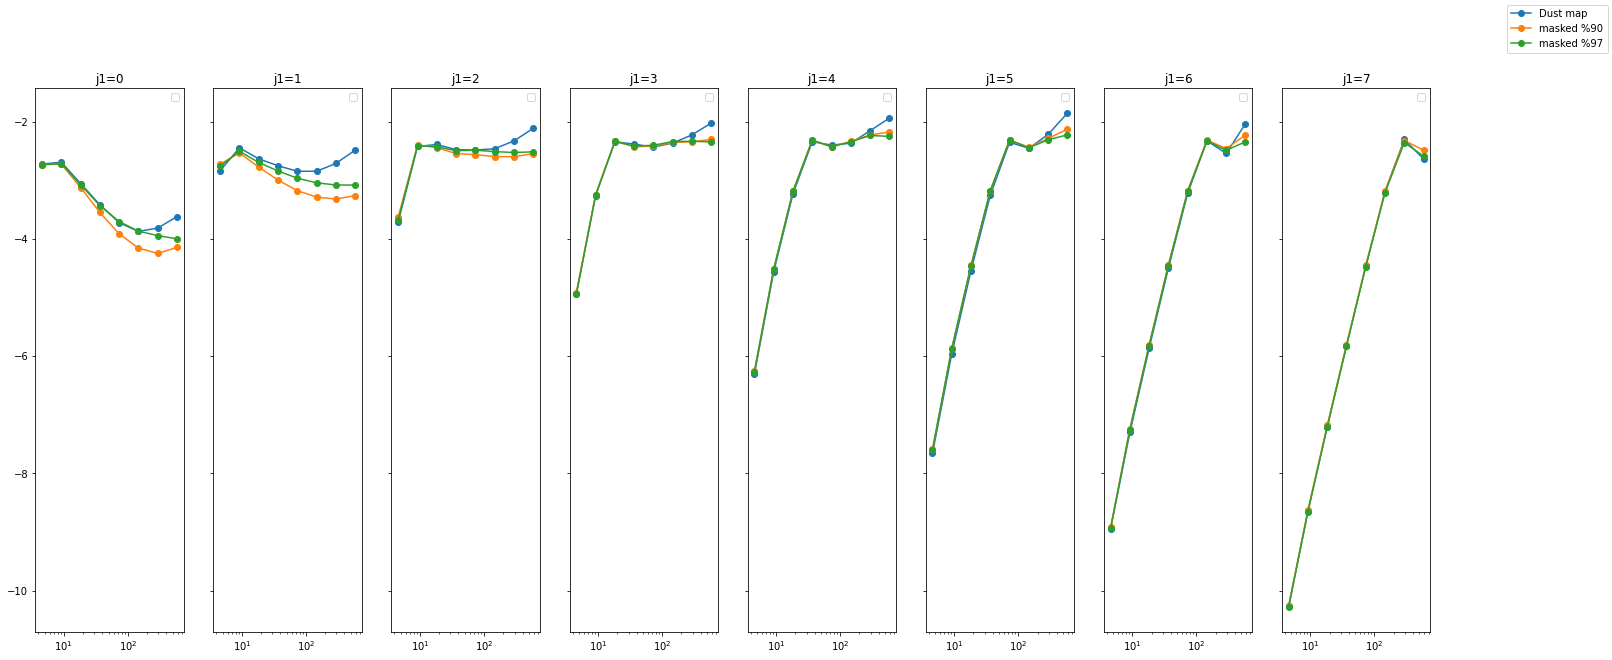

In [54]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale,np.log(s2_dust[j,:]/s1_dust[j]),'o-')
    ax[j].plot (scale,np.log(s2_dust_masked[j,:]/s1_dust_masked[j]),'o-')
    ax[j].plot (scale,np.log(s2_dust_masked_097[j,:]/s1_dust_masked_097[j]),'o-')
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend(["Dust map",  "masked %90" ,"masked %97"])

In [80]:
alm = hp.map2alm (map_dust_0256)

In [81]:
alm.shape

(295296,)